# Analyzing TikTok Influencer Data

### Introduction to Data Analysis with Python

Data Import and Initial Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('../data/raw/Top100Tiktokers.csv')

# Display the first few rows
df.head()

,Rank,Username,Followers,Following,Uploads,Likes
0,1,Khabane lame,162400000,78,1251,2500000000
1,2,charli d'amelio,155700000,1304,2812,11800000000
2,3,MrBeast,107500000,362,394,1100000000
3,4,Bella Poarch,94300000,649,771,2400000000
4,5,Addison Rae,88500000,1,318,5200000000


- What is the structure of our dataset? What columns do we have?
- What data types are we working with?
- Are there any missing values we need to handle?

In [2]:
# Let's check our data info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       100 non-null    int64 
 1   Username   100 non-null    object
 2   Followers  100 non-null    int64 
 3   Following  100 non-null    int64 
 4   Uploads    100 non-null    int64 
 5   Likes      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Rank         0
Username     0
Followers    0
Following    0
Uploads      0
Likes        0
dtype: int64

Data cleaning and preperation

In [3]:
# Convert follower counts to millions for easier interpretation
df['Followers_M'] = df['Followers'] / 1_000_000
df['Likes_B'] = df['Likes'] / 1_000_000_000

# Reset index to make rank a column
df = df.reset_index(drop=True)

In [4]:
df

,Rank,Username,Followers,Following,Uploads,Likes,Followers_M,Likes_B
0,1,Khabane lame,162400000,78,1251,2500000000,162.4,2.5000
1,2,charli d'amelio,155700000,1304,2812,11800000000,155.7,11.8000
2,3,MrBeast,107500000,362,394,1100000000,107.5,1.1000
3,4,Bella Poarch,94300000,649,771,2400000000,94.3,2.4000
4,5,Addison Rae,88500000,1,318,5200000000,88.5,5.2000
...,...,...,...,...,...,...,...,...
95,96,Arnaldo Mangini,32300000,105,2052,251800000,32.3,0.2518
96,97,Fujiiian,32300000,464,1571,1900000000,32.3,1.9000
97,98,Surthycooks,32300000,176,1242,918400000,32.3,0.9184
98,99,Faisal shaikh,3200000,0,456,2000000000,3.2,2.0000


EDA (Exploratory Data Analysis)

In [5]:
# Get basic statistics of numerical columns
df.describe()

,Rank,Followers,Following,Uploads,Likes,Followers_M,Likes_B
count,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,50.500000,5.853000e+07,833.840000,2173.830000,1.609183e+09,58.530000,1.609183
std,29.011492,7.659491e+07,1771.318385,3527.808502,1.669987e+09,76.594911,1.669987
min,1.000000,3.200000e+06,0.000000,26.000000,6.570000e+07,3.200000,0.065700
25%,25.750000,3.602500e+07,35.750000,522.000000,6.328500e+08,36.025000,0.632850
50%,50.500000,4.085000e+07,195.000000,1422.000000,1.200000e+09,40.850000,1.200000
75%,75.250000,5.382500e+07,705.250000,2699.250000,1.925000e+09,53.825000,1.925000
max,100.000000,6.522000e+08,9960.000000,31600.000000,1.180000e+10,652.200000,11.800000


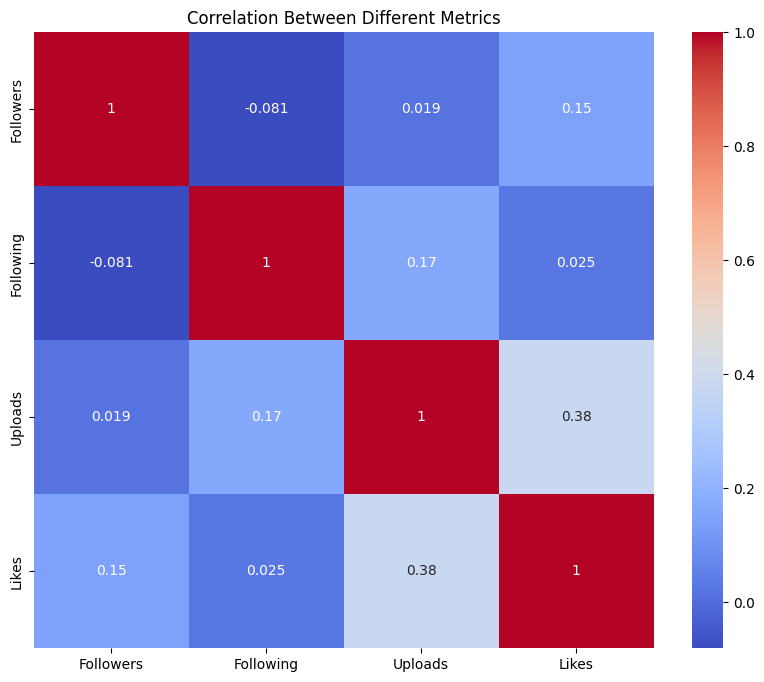

In [6]:
# Create correlation matrix
correlation = df[['Followers', 'Following', 'Uploads', 'Likes']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Metrics')
plt.show()

Targeted Analysis

In [7]:
# Calculate engagement rate (Likes per Follower)
df['Engagement_Rate'] = (df['Likes'] / df['Followers']) * 100

# Display top 5 accounts by engagement rate
df[['Username', 'Engagement_Rate']].sort_values(by='Engagement_Rate', ascending=False).head()

,Username,Engagement_Rate
98,Faisal shaikh,62500.000000
46,Barstool Sports,19203.747073
30,ESPN,12929.292929
93,Kunno,9876.543210
77,Brooke Monk,8857.142857


- Which creators have the highest engagement rates?
- Is there a relationship between follower count and engagement rate?
- What might explain variations in engagement rates?

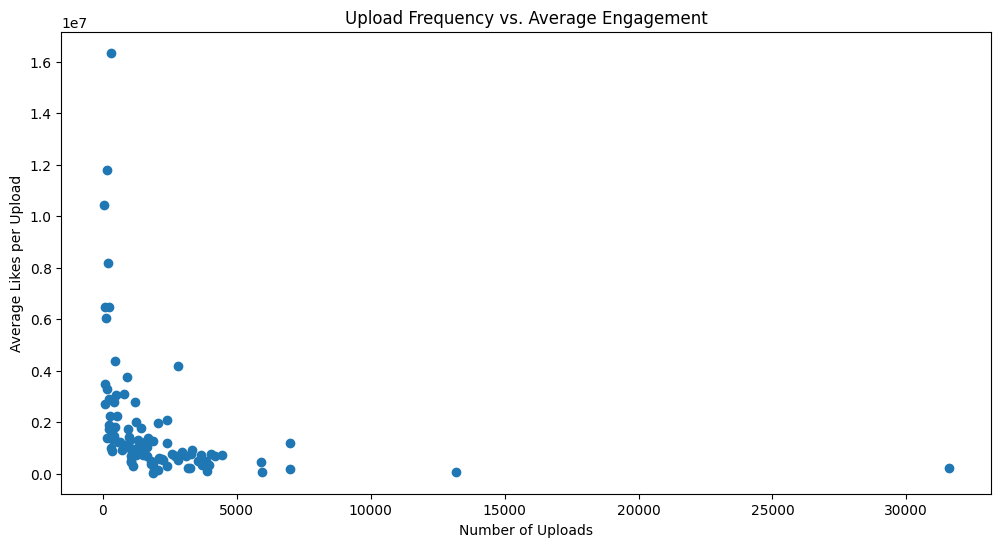

In [8]:
# Calculate average likes per upload
df['Likes_per_Upload'] = df['Likes'] / df['Uploads']

# Compare uploads vs. likes per upload
plt.figure(figsize=(12, 6))
plt.scatter(df['Uploads'], df['Likes_per_Upload'])
plt.xlabel('Number of Uploads')
plt.ylabel('Average Likes per Upload')
plt.title('Upload Frequency vs. Average Engagement')
plt.show()